In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bitcoin.csv")

In [3]:
df.head(-5)

,Date,Open,High,Low,Close,Vol.
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K
...,...,...,...,...,...,...
3783,2023-05-12,26983.1,27044.0,25853.1,26799.2,87.49K
3784,2023-05-13,26798.7,27011.9,26695.6,26777.5,27.95K
3785,2023-05-14,26777.4,27176.1,26609.9,26920.0,26.35K
3786,2023-05-15,26920.4,27651.7,26752.1,27183.9,53.27K


In [4]:
df.describe()

,Open,High,Low,Close
count,3793.000000,3793.000000,3793.000000,3793.000000
mean,11233.252307,11529.297996,10904.581545,11240.315766
std,15421.568722,15827.119004,14960.319732,15422.533996
min,13.300000,13.400000,13.200000,13.300000
25%,450.300000,459.600000,441.900000,451.400000
50%,5208.300000,5322.900000,5033.700000,5209.100000
75%,14976.200000,15648.300000,13902.300000,15043.000000
max,67528.700000,68990.600000,66334.900000,67527.900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3793 non-null   object 
 1   Open    3793 non-null   float64
 2   High    3793 non-null   float64
 3   Low     3793 non-null   float64
 4   Close   3793 non-null   float64
 5   Vol.    3793 non-null   object 
dtypes: float64(4), object(2)
memory usage: 177.9+ KB


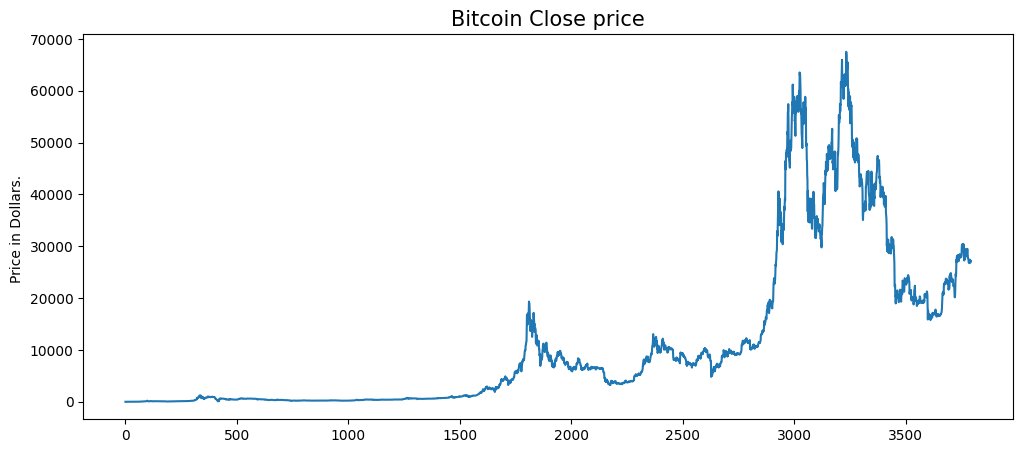

In [6]:
plt.close()
plt.figure(figsize=(12, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price', fontsize=15)
plt.ylabel('Price in Dollars. ')
plt.show()

In [7]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
Vol.     0
dtype: int64

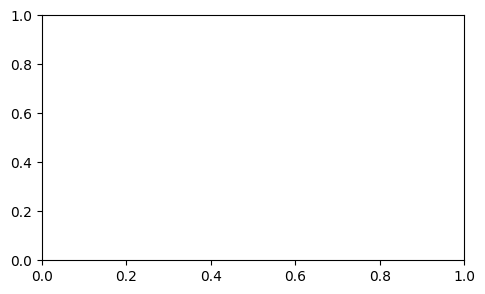

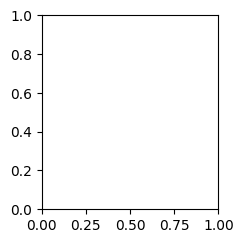

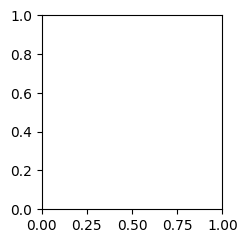

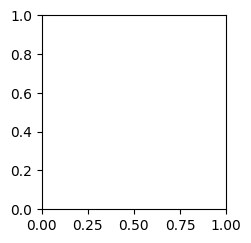

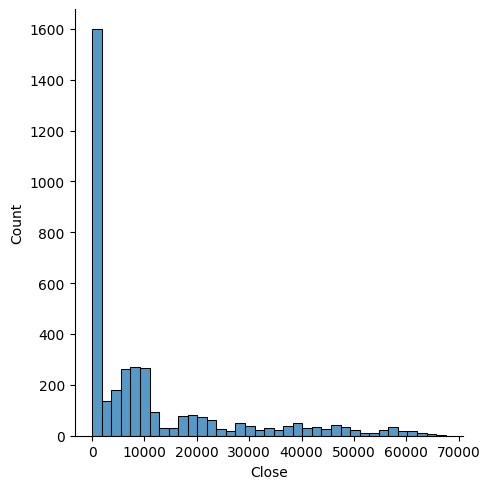

In [8]:
features = ['Open', 'High', 'Low', 'Close']
plt.close()
plt.subplots(figsize=(12,7))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.displot(df[col])
plt.show()

In [9]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')


df.head()

,Date,Open,High,Low,Close,Vol.,year,month,day
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K,2013,1,1
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K,2013,1,2
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K,2013,1,3
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K,2013,1,4
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K,2013,1,5


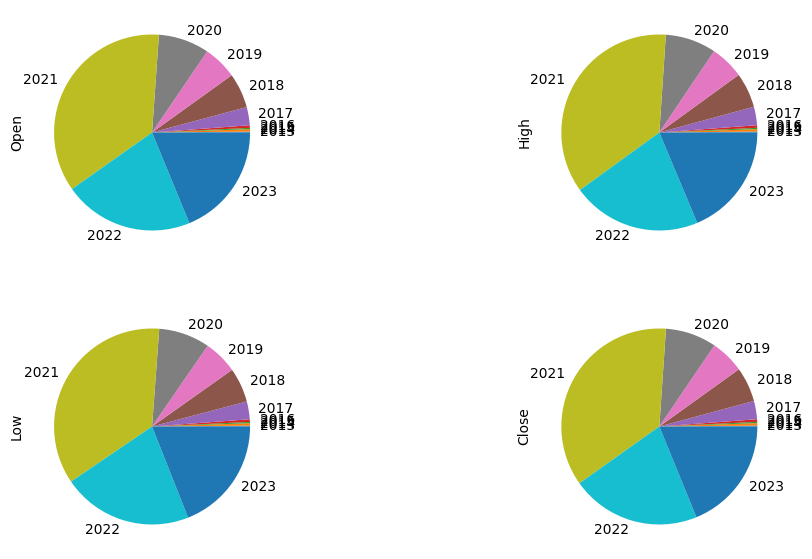

In [10]:
plt.close()

data_grouped = df.groupby('year').mean(numeric_only=True)

plt.subplots(figsize=(12,7))
for i , col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.pie()
  
plt.show()

In [11]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Vol.,year,month,day,is_quarter_end
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K,2013,1,1,0
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K,2013,1,2,0
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K,2013,1,3,0
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K,2013,1,4,0
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K,2013,1,5,0


In [12]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

In [13]:
a =np.where(df['Close'].shift(-1) == df['Close'],1,0)

In [14]:
df['target'][1]

1

In [15]:
print(df['Close'][1],df['Close'].shift(-1)[1])

13.3 13.4


In [17]:
plt.close()